# dATASET gENERATED bY dEEPSEEk randomly 

In [49]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Generate 1000 samples
n_samples = 1000

# ----------------------------------------------------
# Column 1: Income (Log-normal + Extreme Outliers)
# ----------------------------------------------------
income = np.random.lognormal(mean=10.5, sigma=0.8, size=n_samples-10)
income = np.append(income, [500000, 750000, 1e6, 1.2e6, 2e6, 3e6, 5e6, 2.5e6, 4e6, 1.8e6])

# ----------------------------------------------------
# Column 2: Website_Visits (Poisson + Severe Outliers)
# ----------------------------------------------------
web_visits = np.random.poisson(lam=10, size=n_samples-15)
web_visits = np.append(web_visits, [1000, 1500, 2000, 800, 1200, 2500, 3000, 
                                   1800, 950, 2200, 3500, 4000, 2800, 1500, 5000])

# ----------------------------------------------------
# Column 3: Transaction_Amt (Gamma + Extreme Outliers)
# ----------------------------------------------------
transactions = np.random.gamma(shape=2, scale=100, size=n_samples-8)
transactions = np.append(transactions, [10000, 50000, 25000, 75000, 1e5, 2e5, 5e5, 3e5])

# ----------------------------------------------------
# Column 4: City_Population (Pareto + Mega Cities)
# ----------------------------------------------------
city_pop = np.random.pareto(a=1.5, size=n_samples-5) * 10000  # Base population
city_pop = np.append(city_pop, [1e7, 2.5e7, 5e7, 1.5e7, 3e7])  # Mega cities

# Create DataFrame
df = pd.DataFrame({
    'Income': income,
    'Website_Visits': web_visits,
    'Transaction_Amt': transactions,
    'City_Population': city_pop
})

# Save to CSV
df.to_csv('skewed_data_with_outliers.csv', index=False)

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
df=pd.read_csv('skewed_data_with_outliers.csv')
df 

,Income,Website_Visits,Transaction_Amt,City_Population
0,5.403414e+04,8,276.991565,1.770600e+04
1,3.251278e+04,5,17.382088,1.305564e+03
2,6.097083e+04,9,227.852897,6.138931e+03
3,1.228137e+05,11,373.933963,5.612293e+03
4,3.011195e+04,13,132.121611,9.233125e+03
...,...,...,...,...
995,3.000000e+06,3500,75000.000000,1.000000e+07
996,5.000000e+06,4000,100000.000000,2.500000e+07
997,2.500000e+06,2800,200000.000000,5.000000e+07
998,4.000000e+06,1500,500000.000000,1.500000e+07


In [52]:
df

,Income,Website_Visits,Transaction_Amt,City_Population
0,5.403414e+04,8,276.991565,1.770600e+04
1,3.251278e+04,5,17.382088,1.305564e+03
2,6.097083e+04,9,227.852897,6.138931e+03
3,1.228137e+05,11,373.933963,5.612293e+03
4,3.011195e+04,13,132.121611,9.233125e+03
...,...,...,...,...
995,3.000000e+06,3500,75000.000000,1.000000e+07
996,5.000000e+06,4000,100000.000000,2.500000e+07
997,2.500000e+06,2800,200000.000000,5.000000e+07
998,4.000000e+06,1500,500000.000000,1.500000e+07


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import FunctionTransformer



df.isna().sum()

Income             0
Website_Visits     0
Transaction_Amt    0
City_Population    0
dtype: int64

In [54]:
df['Income'].mean()

np.float64(71960.60173380538)

In [55]:
df['Income'].median()

np.float64(37509.242850069495)

In [56]:
df['Income'].skew()

np.float64(13.677961416217334)

In [57]:
df['Income'].kurtosis()

np.float64(214.42133279818685)

<Axes: xlabel='Income', ylabel='Density'>

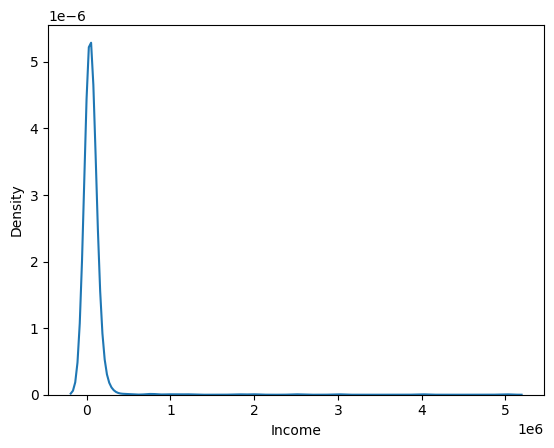

In [58]:
sns.kdeplot(df['Income'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9316\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

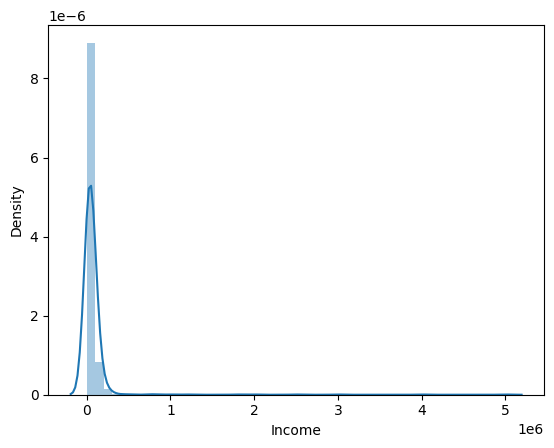

In [59]:
sns.distplot(df['Income'])

<Axes: ylabel='Income'>

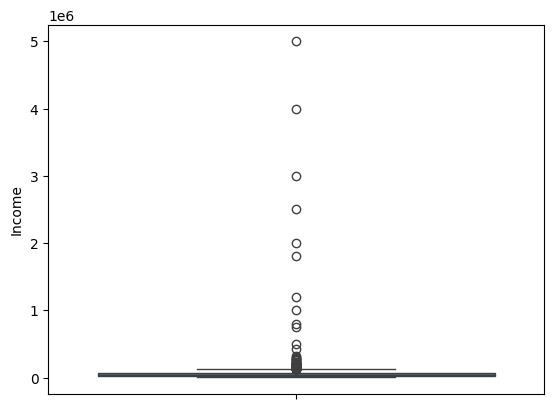

In [60]:
sns.boxplot(df['Income'])

In [61]:
trf1=FunctionTransformer(func=np.log1p)
trf2=FunctionTransformer(func=np.sqrt)
trf3=FunctionTransformer(func=lambda x:1/(x+1))


In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

In [63]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)

In [64]:
x=df[['Income','Website_Visits','City_Population']]
y=df['Transaction_Amt']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(df[['Income','Website_Visits','City_Population']],df['Transaction_Amt'],train_size=0.8,random_state=32)

In [66]:
x_train

,Income,Website_Visits,City_Population
799,37190.361663,8,325.884374
471,5758.677164,8,13849.556557
242,54392.949691,11,7214.542516
704,10453.547372,11,8389.858708
839,30601.641326,5,23235.447640
...,...,...,...
892,85249.689394,13,2278.033081
310,30511.380905,7,38596.017261
901,26511.369300,10,3798.678218
555,26121.092981,7,2620.734765


In [67]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [68]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error
from sklearn.pipeline import Pipeline
print('CV::\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_median_absolute_error')),'\tR2:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2')),'\tRMSE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_root_mean_squared_error')),'\tMAE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')),'\tExplained Variance\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='explained_variance')))
y_pred=model.predict(x_test) 
print('R2 Score::\t',r2_score(y_test,y_pred),'MAE:\t\t', mean_absolute_error(y_test, y_pred))

CV::	 -94.4199133522477 	R2:	 -0.29843038239491104 	RMSE:	 -7191.48347962708 	MAE:	 -1371.5812071645723 	Explained Variance	 -0.28604771685178526
R2 Score::	 -5.042715413548998 MAE:		 1415.6860839330302


# NOw Applying Log Transformation on all the columns and then training and testing the model 

## Applying Log Transformation 

In [69]:
model2=RandomForestRegressor(n_jobs=-1,random_state=32)
pipe=Pipeline([
    ('trf',trf1), 
    ('model',model2)
],)

In [70]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=32))])

## MOdel Training After Applying Square Root Transformation 

In [110]:
y_pred=pipe.predict(x_test)
x_transformed=trf1.fit_transform(x)
print('CV::\t',np.mean(cross_val_score(model3,x_transformed,y_train,cv=8,n_jobs=-1,scoring='neg_median_absolute_error')),'\tR2:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2')),'\tRMSE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_root_mean_squared_error')),'\tMAE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')),'\tExplained Variance\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='explained_variance')))

print('R2 Score::\t',r2_score(y_test,y_pred),'MAE:\t\t', mean_absolute_error(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1000, 800]

In [109]:
x_train_transformed=trf1.fit_transform(x_train)
print('CV::\t',np.mean(cross_val_score(model3,x_train_transformed,y_train,cv=8,n_jobs=-1,scoring='neg_median_absolute_error')),'\tR2:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2')),'\tRMSE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_root_mean_squared_error')),'\tMAE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')),'\tExplained Variance\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='explained_variance')))


CV::	 -98.41491900538743 	R2:	 -0.2984303823949111 	RMSE:	 -7191.48347962708 	MAE:	 -1371.5812071645723 	Explained Variance	 -0.2860477168517853


In [72]:
model3=RandomForestRegressor(n_jobs=-1,random_state=22)

In [73]:
pipe=Pipeline([
    ('tran',trf2), 
    ('model',model3)
])

In [74]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tran', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=22))])

In [100]:
x_transformed=trf2.fit_transform(x)

In [106]:
y_pred=pipe.predict(x_test)
print('CV::\t',np.mean(cross_val_score(model3,x_transformed,y,cv=8,n_jobs=-1,scoring='neg_median_absolute_error')),'\tR2:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2')),'\tRMSE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_root_mean_squared_error')),'\tMAE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')),'\tExplained Variance\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='explained_variance')))
print('\nR2 Score::\t',r2_score(y_test,y_pred),'\tMAE:\t', mean_absolute_error(y_test, y_pred))

CV::	 -95.79549885697425 	R2:	 -0.2984303823949111 	RMSE:	 -7191.48347962708 	MAE:	 -1371.5812071645723 	Explained Variance	 -0.2860477168517853

R2 Score::	 -5.736339069919575 	MAE:	 1511.463922961373


In [108]:
x_train_transformed=trf2.fit_transform(x_train)
print('CV::\t',np.mean(cross_val_score(model3,x_train_transformed,y_train,cv=8,n_jobs=-1,scoring='neg_median_absolute_error')),'\tR2:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2')),'\tRMSE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_root_mean_squared_error')),'\tMAE:\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')),'\tExplained Variance\t',np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='explained_variance')))


CV::	 -98.39948099937462 	R2:	 -0.2984303823949111 	RMSE:	 -7191.48347962708 	MAE:	 -1371.5812071645723 	Explained Variance	 -0.28604771685178537


# After Applying Transformation 

<Figure size 600x450 with 0 Axes>

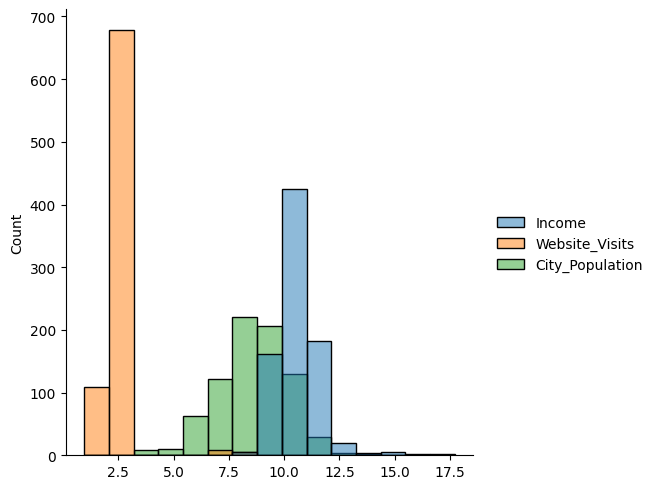

In [76]:
plt.figure(figsize=(6,4.5))
sns.displot(trf1.fit_transform(x_train))
plt.savefig('All in one.png')
plt.show()

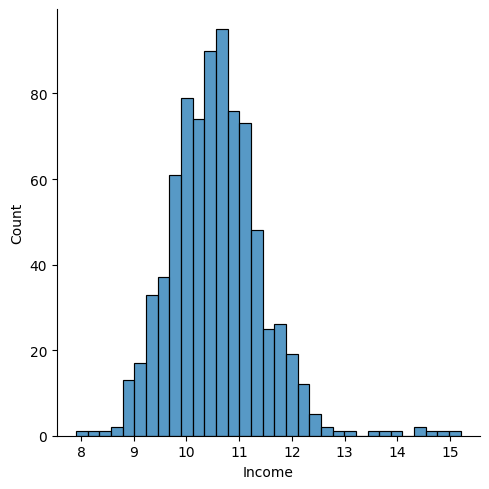

In [77]:
sns.displot(trf1.fit_transform(x_train['Income']))
plt.savefig('Initial DIsPlot On Income COlumn.png')

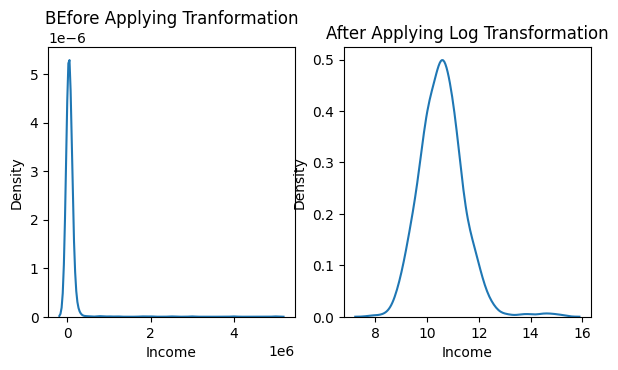

In [78]:
plt.figure(figsize=(7,3.5))
plt.subplot(121)
sns.kdeplot(df['Income'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf1.fit_transform(x_train['Income']))
plt.title('After Applying Log Transformation')
plt.savefig('Log Trans. Income Column.png')
plt.show()

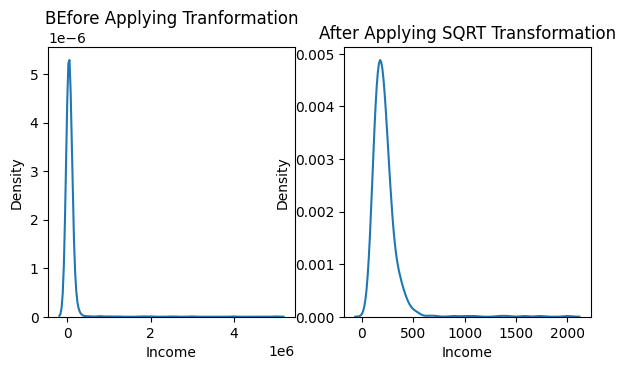

In [79]:
plt.figure(figsize=(7,3.5))
plt.subplot(121)
sns.kdeplot(df['Income'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf2.fit_transform(x_train['Income']))
plt.title('After Applying SQRT Transformation')
plt.savefig('SQRT Trans. Income Column.png')
plt.show()

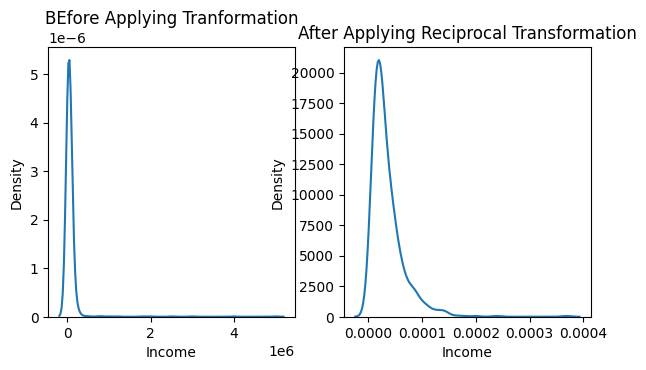

In [80]:
plt.figure(figsize=(7,3.5))
plt.subplot(121)
sns.kdeplot(df['Income'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf3.fit_transform(x_train['Income']))
plt.title('After Applying Reciprocal Transformation')
plt.savefig('Reciprocal Trans. Income Column.png')
plt.show()

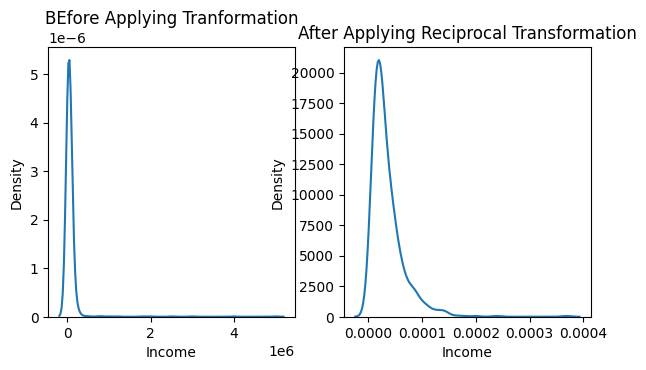

In [81]:
plt.figure(figsize=(7,3.5))
plt.subplot(121)
sns.kdeplot(df['Income'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf3.fit_transform(x_train['Income']))
plt.title('After Applying Reciprocal Transformation')
plt.savefig('Reciprocal Transformation On Income Column.png')
plt.show()

# Applying On The City Population COlumn 

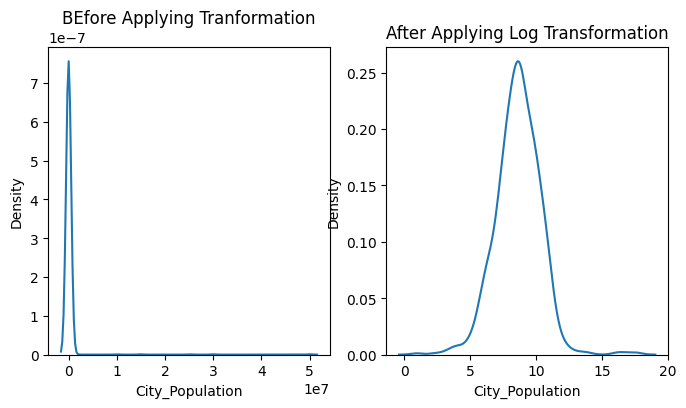

In [82]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.kdeplot(df['City_Population'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf1.fit_transform(x_train['City_Population']))
plt.title('After Applying Log Transformation')
plt.savefig('City Population Log Transformation Column.png')
plt.show()

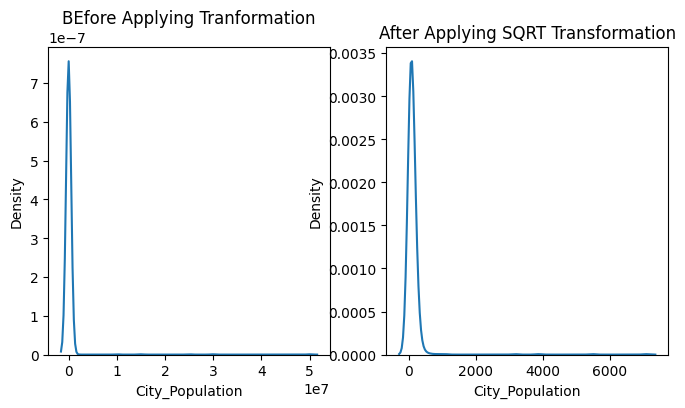

In [83]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.kdeplot(df['City_Population'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf2.fit_transform(x_train['City_Population']))
plt.title('After Applying SQRT Transformation')
plt.savefig('City Population SQRT Transformation Column.png')
plt.show()

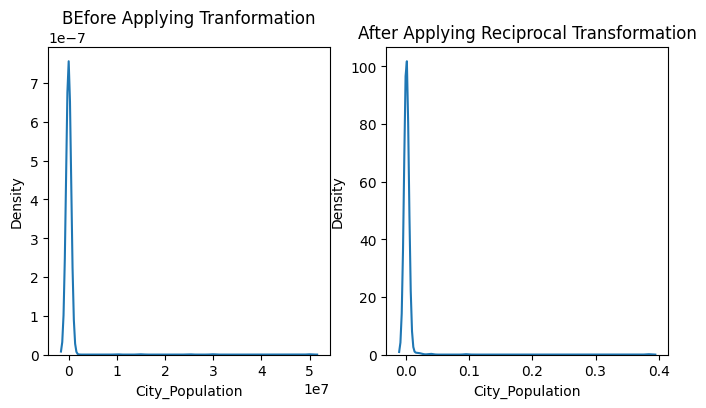

In [84]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.kdeplot(df['City_Population'])
plt.title('BEfore Applying Tranformation')
plt.subplot(122)
sns.kdeplot(trf3.fit_transform(x_train['City_Population']))
plt.title('After Applying Reciprocal Transformation')
plt.savefig('City Population Reciprocal Transformation Column.png')
plt.show()

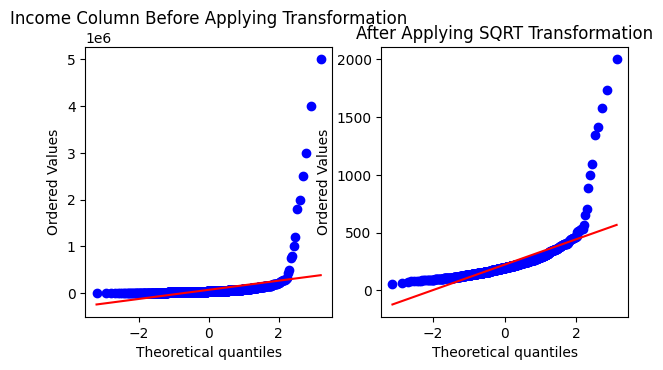

In [85]:
plt.figure(figsize=(7,3.5))
plt.subplot(121) 
stats.probplot(df['Income'],plot=plt) 
plt.title('Income Column Before Applying Transformation')

plt.subplot(122)
stats.probplot(trf2.fit_transform(x_train['Income']),plot=plt)
plt.title('After Applying SQRT Transformation')
plt.savefig('Probplot- SQRT Trans. Income Column.png')
plt.show()


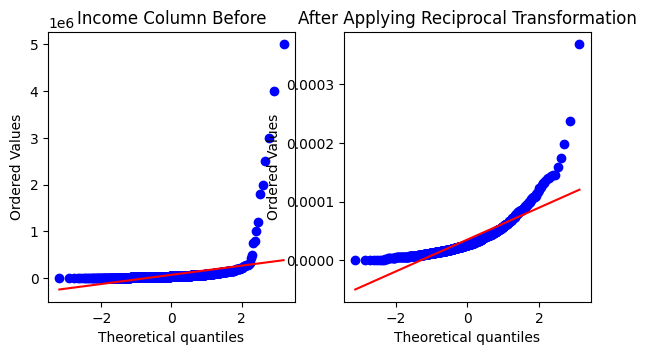

In [86]:
plt.figure(figsize=(7,3.5))
plt.subplot(121) 
stats.probplot(df['Income'],plot=plt) 
plt.title('Income Column Before')

plt.subplot(122)
stats.probplot(trf3.fit_transform(x_train['Income']),plot=plt)
plt.title('After Applying Reciprocal Transformation')
plt.savefig('Probplot-Reciprocal Trans. Income Column.png')
plt.show()


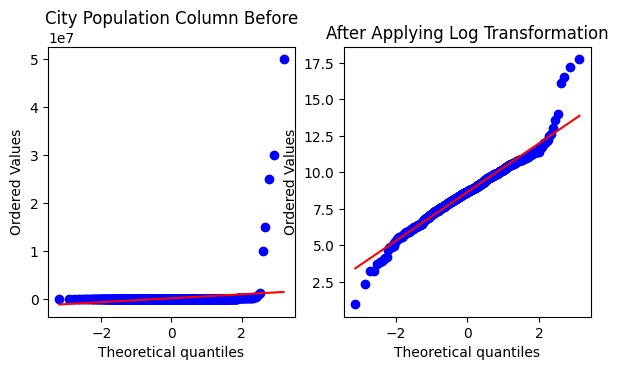

In [87]:
plt.figure(figsize=(7,3.5))
plt.subplot(121) 
stats.probplot(df['City_Population'],plot=plt) 
plt.title('City Population Column Before')

plt.subplot(122)
stats.probplot(trf1.fit_transform(x_train['City_Population']),plot=plt)
plt.title('After Applying Log Transformation')
plt.savefig('Probplot-Log Trans. City Pupulation Column.png')
plt.show()


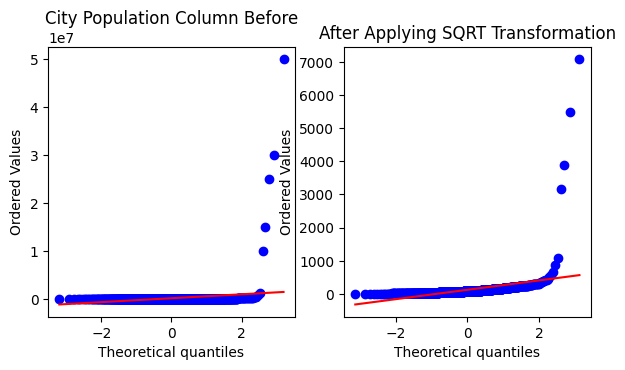

In [88]:
plt.figure(figsize=(7,3.5))
plt.subplot(121) 
stats.probplot(df['City_Population'],plot=plt) 
plt.title('City Population Column Before')

plt.subplot(122)
stats.probplot(trf2.fit_transform(x_train['City_Population']),plot=plt)
plt.title('After Applying SQRT Transformation')
plt.savefig('Probplot-SQRT Trans. City Pupulation Column.png')
plt.show()


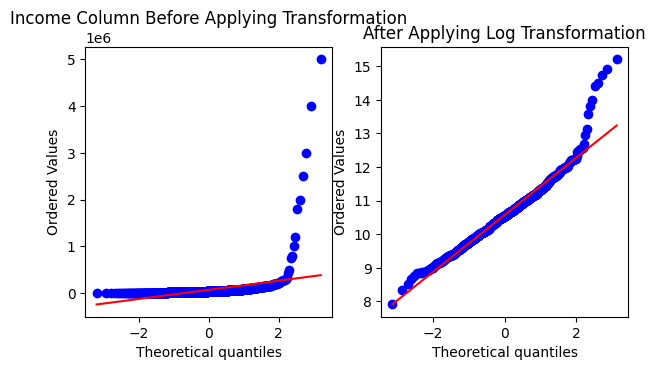

In [89]:
plt.figure(figsize=(7,3.5))
plt.subplot(121) 
stats.probplot(df['Income'],plot=plt) 
plt.title('Income Column Before Applying Transformation')

plt.subplot(122)
stats.probplot(trf1.fit_transform(x_train['Income']),plot=plt)
plt.title('After Applying Log Transformation')
plt.savefig('Probplot-Log Trans. Income Column.png')
plt.show()


# Refinfing the Model With Further Feature Engineering 

In [90]:
x_train

,Income,Website_Visits,City_Population
799,37190.361663,8,325.884374
471,5758.677164,8,13849.556557
242,54392.949691,11,7214.542516
704,10453.547372,11,8389.858708
839,30601.641326,5,23235.447640
...,...,...,...
892,85249.689394,13,2278.033081
310,30511.380905,7,38596.017261
901,26511.369300,10,3798.678218
555,26121.092981,7,2620.734765


In [91]:
df['Website_Visits'].mean()

np.float64(43.583)

In [92]:
df['Website_Visits'].median()

np.float64(10.0)

In [93]:
df['Website_Visits'].mode()

0    11
Name: Website_Visits, dtype: int64

<Axes: xlabel='Website_Visits', ylabel='Density'>

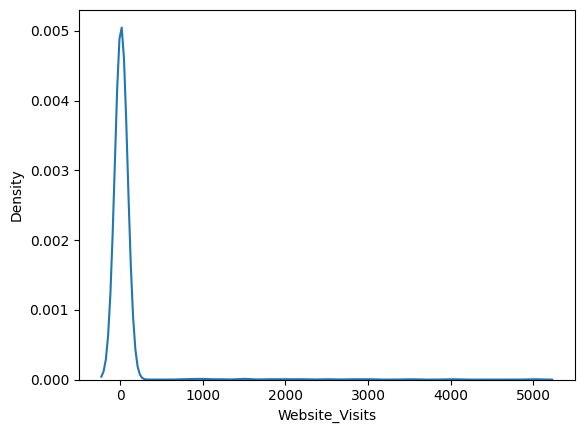

In [94]:
sns.kdeplot(df['Website_Visits'])

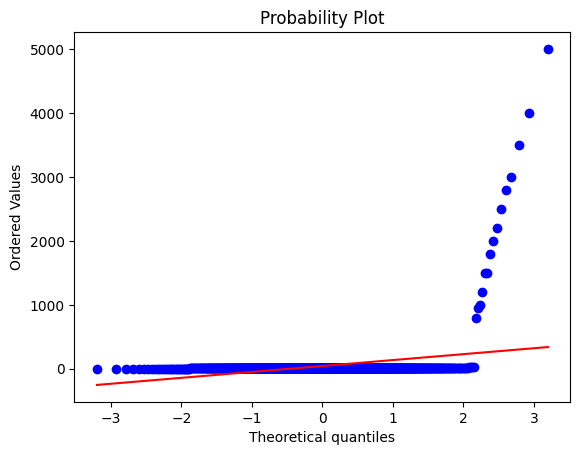

In [95]:
stats.probplot(df['Website_Visits'],plot=plt )
plt.show()

In [96]:
RandomForestRegressor()

RandomForestRegressor()